#code written by: Breeanna Watters
#code written starting: Nov 2, 2022 to Dec 1,2022
#written for project 4: Convolution with Proj 3 Code
#ece44901 Machine Learning, Undergrad student

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
#from sklearn.metrics import confusion_matrix , classification_report

data loading all 6000 images 5000 train and 1000 test and added labels for the ten options

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()


converting data into better layout for reading data

In [3]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)
labels = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]


added plot to show the image being refrenced

In [4]:
def plot(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(labels[y[index]])

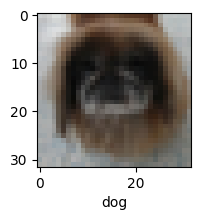

In [5]:
plot(X_train, y_train, 999)

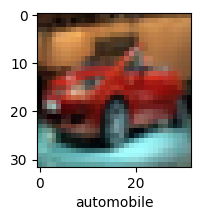

In [6]:
plot(X_train, y_train, 45)

This is done to normalize the images because there are 255 bits in RGB

In [7]:
X_train = X_train / 255.0
X_test = X_test / 255.0

this just does the basic relu twice to train the data and then uses tensorflow commands to calculate the loss in the training. This is done using the train data set. with 10 run throughs.

In [8]:
cnn = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

cnn.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 76s 48ms/step - loss: 1.8113 - accuracy: 0.3569
Epoch 2/10
1563/1563 [==============================] - 74s 47ms/step - loss: 1.6236 - accuracy: 0.4281
Epoch 3/10
1563/1563 [==============================] - 73s 47ms/step - loss: 1.5380 - accuracy: 0.4567
Epoch 4/10
1563/1563 [==============================] - 73s 47ms/step - loss: 1.4809 - accuracy: 0.4815
Epoch 5/10
1563/1563 [==============================] - 78s 50ms/step - loss: 1.4305 - accuracy: 0.4963
Epoch 6/10
1563/1563 [==============================] - 78s 50ms/step - loss: 1.3890 - accuracy: 0.5123
Epoch 7/10
1563/1563 [==============================] - 77s 50ms/step - loss: 1.3509 - accuracy: 0.5241
Epoch 8/10
1563/1563 [==============================] - 78s 50ms/step - loss: 1.3168 - accuracy: 0.5378
Epoch 9/10
1563/1563 [==============================] - 79s 50ms/step - loss: 1.2853 - accuracy: 0.5486
Epoch 10/10
1563/1563 [==============================] - 81s 52m

this evaluates the test data set. after the accuracy of the train data set is about 56% with a loss of 1.2

In [9]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 5s 15ms/step - loss: 1.3939 - accuracy: 0.5094


[1.3938757181167603, 0.5094000101089478]

The test data set runs at a accuracy of 50%and a loss of 1.3, when doing small amouts of relu and softmax to the training set.

This is done to show how the first 10 images are pridicted to be and what they actually are.

In [10]:
y_pred = cnn.predict(X_test)
y_pred[:10]
y_labels = [np.argmax(element) for element in y_pred]
print("\n Prediction results\n")
y_labels[:10]


313/313 [==============================] - 5s 14ms/step

 Prediction results



[3, 9, 0, 0, 4, 6, 1, 4, 4, 1]

In [11]:

print("Real results\n")
y_test[:10]

Real results



array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1], dtype=uint8)

[3, 8, 0, 8, 4, 6, 1, 6, 3, 1]
array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1], dtype=uint8)

are the results with my test

 4, 6, 1, 6, 3, 1]
 6, 6, 1, 6, 3, 1]

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

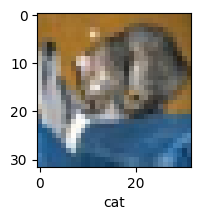

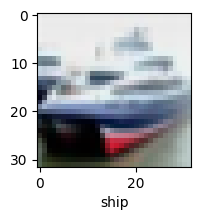

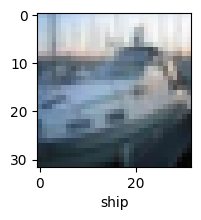

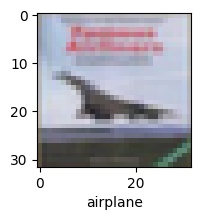

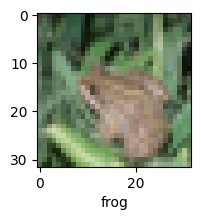

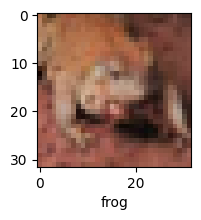

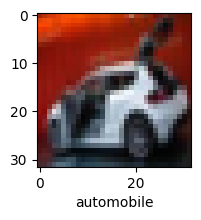

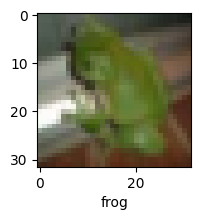

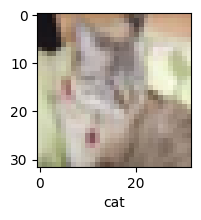

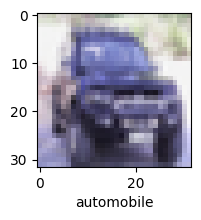

In [12]:
plot(X_test, y_test,0)
plot(X_test, y_test,1)
plot(X_test, y_test,2)
plot(X_test, y_test,3)
plot(X_test, y_test,4)
plot(X_test, y_test,5)
plot(X_test, y_test,6)
plot(X_test, y_test,7)
plot(X_test, y_test,8)
plot(X_test, y_test,9)

labels[:10]


Image 0 was correct it was a cat
Image 1 was correct it is a ship
Image 2 was incorrect it is a ship but it was thought to be a airplane.
Image 3 was incorrect it is a airplane but it was thought to be a ship.
Image 4 was incorrect it is a frog but it was thought to be a deer.
Image 5 was correct it was a frog
Image 6 was correct it is a automobile
Image 7 was correct it was a frog
Image 8 was correct it is a cat 
Image 9 was correct it was an automobile

#
#
#
#
#
#
#

Here is the start of the convolution for project 4.

This code here is used to do the convolution. This code useses two layers of convolution

In [13]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnn.fit(X_train, y_train, epochs=15)

Epoch 1/15
1563/1563 [==============================] - 33s 21ms/step - loss: 1.4562 - accuracy: 0.4745
Epoch 2/15
1563/1563 [==============================] - 33s 21ms/step - loss: 1.1062 - accuracy: 0.6143
Epoch 3/15
1563/1563 [==============================] - 33s 21ms/step - loss: 0.9745 - accuracy: 0.6612
Epoch 4/15
1563/1563 [==============================] - 33s 21ms/step - loss: 0.8860 - accuracy: 0.6921
Epoch 5/15
1563/1563 [==============================] - 34s 22ms/step - loss: 0.8188 - accuracy: 0.7169
Epoch 6/15
1563/1563 [==============================] - 34s 22ms/step - loss: 0.7610 - accuracy: 0.7349
Epoch 7/15
1563/1563 [==============================] - 34s 22ms/step - loss: 0.7143 - accuracy: 0.7502
Epoch 8/15
1563/1563 [==============================] - 34s 22ms/step - loss: 0.6707 - accuracy: 0.7666
Epoch 9/15
1563/1563 [==============================] - 34s 22ms/step - loss: 0.6313 - accuracy: 0.7791
Epoch 10/15
1563/1563 [==============================] - 34s 22m

With this convolution, the result of this test have a 83% accuracy and a loss of .47. These all change with the epochs ran of the code. These numbers are always different when running the code. 

In [14]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 3s 8ms/step - loss: 1.0560 - accuracy: 0.6900


[1.0559641122817993, 0.6899999976158142]

This part of the code means that the accuracy the program gets for the test data results in about 70% accuracy. 

In [15]:
y_pred = cnn.predict(X_test)
y_pred[:10]
y_labels = [np.argmax(element) for element in y_pred]
print("\n Prediction results\n")
y_labels[:10]

313/313 [==============================] - 2s 7ms/step

 Prediction results



[5, 8, 8, 0, 6, 6, 1, 6, 3, 9]

In [16]:
print("Real results\n")
y_test[:10]

Real results



array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1], dtype=uint8)

From these results only data from image 2 is incorrect. This was said to be an automobile when it is actually a ship.

This code is compared to the results from project 3 
Project 3 had an accuracy of about 56% and a loss of 1.2. 
Project 4 has an accuracy of about 83% and a loss of 0.47.
You can see the convolution from proj 4 makes the results better for the learning of the data images and identifing them. Even though proj 3 did an okay job of accurately identifing half the images correctly, proj 4 resulted in having about 80% of the results being correct. 

These two codes both result in identifing the data, the cinvolution just does a better job in correctly doing that. Convolution is also faster to train then the fully connected network. 

In the end convolution is better to use when training the data for this project. 